# QTM 531 HW2
# Ao Lyu (Lorna)

For this assignment I will interact with an API and extract information contained in JSON format. OpenAlex is a fully open catalog of the global research system, with millions of records from different types of sources. You can read more about it here:
https://docs.openalex.org
https://docs.openalex.org/quickstart-tutorial

## Question 1
#### 1. How many works have “artificial intelligence” in the title?

In [1]:
import requests
import pandas as pd
import json

In [2]:
# Define new string variable of the url
url_openalex_work = "https://api.openalex.org/works"
url_openalex_ai = "https://api.openalex.org/works?filter" + \
                  "=title.search:artificial intelligence"

In [3]:
params = {
    'filter': 'title.search:artificial intelligence',
    'per-page':200,
}

# Sending get request
ai_results = requests.\
    get(url_openalex_work,params = params).json()

In [4]:
# Describe
ai_results

{'meta': {'count': 111627,
  'db_response_time_ms': 268,
  'page': 1,
  'per_page': 200,
  'groups_count': None},
 'results': [{'id': 'https://openalex.org/W2122410182',
   'doi': 'https://doi.org/10.5860/choice.33-1577',
   'title': 'Artificial intelligence: a modern approach',
   'display_name': 'Artificial intelligence: a modern approach',
   'relevance_score': 4914.6074,
   'publication_year': 1995,
   'publication_date': '1995-11-01',
   'ids': {'openalex': 'https://openalex.org/W2122410182',
    'doi': 'https://doi.org/10.5860/choice.33-1577',
    'mag': '2122410182'},
   'language': 'en',
   'primary_location': {'is_oa': False,
    'landing_page_url': 'https://doi.org/10.5860/choice.33-1577',
    'pdf_url': None,
    'source': {'id': 'https://openalex.org/S2764375719',
     'display_name': 'Choice Reviews Online',
     'issn_l': '0009-4978',
     'issn': ['0009-4978', '1943-5975', '1523-8253'],
     'is_oa': False,
     'is_in_doaj': False,
     'host_organization': 'https://ope

In [5]:
with open('figures/convert_search_results1.txt', 'w') as file: 
    file.write(json.dumps(ai_results, indent =4))

In [36]:
# Using loop to process all pages 
current_page = 1
has_more_pages = True

while has_more_pages:
    params['page'] = current_page  
    response = requests.get(url_openalex_work, params=params)
    loop_data = response.json() 
    
    # Get result
    print(f"Processing page {current_page}")

    if "your_method_to_determine_there_is_no_more_page" in loop_data:
        has_more_pages = False  
    else:
        current_page += 1 


# It took so long time, so i stoped it at 800 pages. 

Processing page 1
Processing page 2
Processing page 3
Processing page 4
Processing page 5
Processing page 6
Processing page 7
Processing page 8
Processing page 9
Processing page 10
Processing page 11
Processing page 12
Processing page 13
Processing page 14
Processing page 15
Processing page 16
Processing page 17
Processing page 18
Processing page 19
Processing page 20
Processing page 21
Processing page 22
Processing page 23
Processing page 24
Processing page 25
Processing page 26
Processing page 27
Processing page 28
Processing page 29
Processing page 30
Processing page 31
Processing page 32
Processing page 33
Processing page 34
Processing page 35
Processing page 36
Processing page 37
Processing page 38
Processing page 39
Processing page 40
Processing page 41
Processing page 42
Processing page 43
Processing page 44
Processing page 45
Processing page 46
Processing page 47
Processing page 48
Processing page 49
Processing page 50
Processing page 51
Processing page 52
Processing page 53
Pr

KeyboardInterrupt: 

In [6]:
total_works = ai_results['meta']['count']
total_works

111627

#### Conclusion
##### There are 111627 works have “artificial intelligence” in the title.


## Question 2
#### Filter years since 2020 and group by the country of the author’s affiliation. Produce a table which sorts the countries by number of publications about artificial intelligence.


In [11]:
params1 = {
    'filter': 'publication_year:>2019,title.search:artificial intelligence',
    'group_by': 'authorships.countries'
}

# Sending get request
response1 = requests.get(url_openalex_work, params=params1)

# Parsing the JSON response
filtered_data = response1.json()

filtered_data

{'meta': {'count': 78334,
  'db_response_time_ms': 181,
  'page': 1,
  'per_page': 200,
  'groups_count': 189},
 'group_by': [{'key': 'US',
   'key_display_name': 'United States of America',
   'count': 11105},
  {'key': 'CN', 'key_display_name': 'China', 'count': 9524},
  {'key': 'IN', 'key_display_name': 'India', 'count': 6315},
  {'key': 'GB',
   'key_display_name': 'United Kingdom of Great Britain and Northern Ireland',
   'count': 4001},
  {'key': 'DE', 'key_display_name': 'Germany', 'count': 2585},
  {'key': 'IT', 'key_display_name': 'Italy', 'count': 2364},
  {'key': 'CA', 'key_display_name': 'Canada', 'count': 1942},
  {'key': 'AU', 'key_display_name': 'Australia', 'count': 1679},
  {'key': 'RU', 'key_display_name': 'Russian Federation', 'count': 1594},
  {'key': 'FR', 'key_display_name': 'France', 'count': 1591},
  {'key': 'ES', 'key_display_name': 'Spain', 'count': 1569},
  {'key': 'KR', 'key_display_name': 'Korea, Republic of', 'count': 1541},
  {'key': 'JP', 'key_display_na

In [12]:
# Convert the 'group_by' list to a DataFrame
table = pd.DataFrame(filtered_data['group_by'])

table

key                                   key_display_name  count
0    US                           United States of America  11105
1    CN                                              China   9524
2    IN                                              India   6315
3    GB  United Kingdom of Great Britain and Northern I...   4001
4    DE                                            Germany   2585
..   ..                                                ...    ...
184  SV                                        El Salvador      1
185  TC                           Turks and Caicos Islands      1
186  TL                                        Timor-Leste      1
187  TO                                              Tonga      1
188  WS                                              Samoa      1

[189 rows x 3 columns]

In [14]:
# Now I want to get a new column for the unknown country
total_publications = 65739  
known_publications = table['count'].sum()
unknown_publications_count = total_publications - known_publications

# Add unknown country column
unknown_row = pd.DataFrame({'key': ['Unknown'],
                            'count': [unknown_publications_count]})
table = pd.concat([table, unknown_row], ignore_index=True)

# Ascending
table = table.sort_values(by='count', ascending=False)

# Result
print(table)

         key                                   key_display_name  count
0         US                           United States of America  11105
1         CN                                              China   9524
2         IN                                              India   6315
3         GB  United Kingdom of Great Britain and Northern I...   4001
4         DE                                            Germany   2585
..       ...                                                ...    ...
165       MH                                   Marshall Islands      1
164       LR                                            Liberia      1
163       SL                                       Sierra Leone      1
190  Unknown                                                NaN      0
189  Unknown                                                NaN  -6485

[191 rows x 3 columns]


## Question 3
#### What are the names of the 10 most highly cited papers on artificial intelligence since 2020? How many citations do they have? What are the authors? What institutions are they affiliated with?

In [15]:
params2 = {
    'filter': 'publication_year:>2019,title.search:artificial intelligence',
    'sort': 'cited_by_count:desc',
    'per_page': 10
}

# Sending get request
response2 = requests.get(url_openalex_work, params=params2)

# Parsing the JSON response
cited_data = response2.json()

cited_data

{'meta': {'count': 78334,
  'db_response_time_ms': 169,
  'page': 1,
  'per_page': 10,
  'groups_count': None},
 'results': [{'id': 'https://openalex.org/W2981731882',
   'doi': 'https://doi.org/10.1016/j.inffus.2019.12.012',
   'title': 'Explainable Artificial Intelligence (XAI): Concepts, taxonomies, opportunities and challenges toward responsible AI',
   'display_name': 'Explainable Artificial Intelligence (XAI): Concepts, taxonomies, opportunities and challenges toward responsible AI',
   'publication_year': 2020,
   'publication_date': '2020-06-01',
   'ids': {'openalex': 'https://openalex.org/W2981731882',
    'doi': 'https://doi.org/10.1016/j.inffus.2019.12.012',
    'mag': '2981731882'},
   'language': 'en',
   'primary_location': {'is_oa': False,
    'landing_page_url': 'https://doi.org/10.1016/j.inffus.2019.12.012',
    'pdf_url': None,
    'source': {'id': 'https://openalex.org/S7560371',
     'display_name': 'Information Fusion',
     'issn_l': '1566-2535',
     'issn': ['1

In [17]:
data = []
cited_work = cited_data['results']

# Extract basic information available in the provided structure
for result in cited_work:
    paper_id = result['id']
    title = result['display_name']
    publication_year = result['publication_year']
    cited_by_count = result.get('cited_by_count', 0)
    affiliations = result.get('primary_location', {}).\
                          get('source', {}).get('display_name', '')
    authors = [author['author']['display_name'] for author in result['authorships']]
    
    data.append([title, publication_year, cited_by_count, authors, affiliations])

# Convert the list into a DataFrame
top_10_citation_dataframe = \
    pd.DataFrame(data, 
                 columns=['Title', 'Publication Year', 'Citations',
                          'Authors', 'Affiliations'])

top_10_citation_dataframe.head(10)

Title  Publication Year  \
0  Explainable Artificial Intelligence (XAI): Con...              2020   
1  Using Artificial Intelligence to Detect COVID-...              2020   
2  Review of Artificial Intelligence Techniques i...              2021   
3  Artificial Intelligence (AI) applications for ...              2020   
4  The role of artificial intelligence in achievi...              2020   
5  Artificial Intelligence (AI): Multidisciplinar...              2021   
6  Artificial intelligence–enabled rapid diagnosi...              2020   
7  Photonics for artificial intelligence and neur...              2021   
8  A Survey on Explainable Artificial Intelligenc...              2021   
9  Applications of machine learning and artificia...              2020   

   Citations                                            Authors  \
0       3140  [Alejandro Barredo Arrieta, Natalia Díaz-Rodrí...   
1       1518  [Lin Li, Liu Liang Qin, Zeguo Xu, Youbing Yin,...   
2        903  [Feng Shi, Jun Wang, Jun Shi, Ziyan Wu, Qian W...   
3        879  [Raju Vaishya, Mohd Javaid, Ibrahim Haleem Kha...   
4        877  [Ricardo Vinuesa, Hossein Azizpour, Iolanda Le...   
5        850  [Yogesh K. Dwivedi, Laurie Hughes, Elvira Isma...   
6        739  [Xueyan Mei, Hao-Chih Lee, Kai-yue Diao, Mingq...   
7        713  [Bhavin J. Shastri, Alexander N. Tait, Thomas ...   
8        698                          [Erico Tjoa, Cuntai Guan]   
9        547  [Samuel Lalmuanawma, Jamal Hussain, Lalrinfela...   

                                        Affiliations  
0                                 Information Fusion  
1                                          Radiology  
2             IEEE Reviews in Biomedical Engineering  
3  Diabetes & Metabolic Syndrome: Clinical Resear...  
4                              Nature Communications  
5    International Journal of Information Management  
6                                    Nature Medicine  
7                                   Nature Photonics  
8  IEEE transactions on neural networks and learn...  
9                         Chaos, Solitons & Fractals

## Question4
#### How has the number of publications with the word “artificial intelligence” changed year-to-year since 2000? How this compare to the usage of the word “LLM” or “GPT”? Do the analysis for another keyword of your interest. Plot your results in a graph.


In [25]:
params3 = {
    'filter': 'title.search:artificial intelligence,publication_year:>1999,publication_year:<2025',
    'group_by': 'publication_year',
}

# Sending get request
response3 = requests.get(url_openalex_work, params=params3)

# Parsing the JSON response
difference_data = response3.json()

difference_data

{'meta': {'count': 104054,
  'db_response_time_ms': 28,
  'page': 1,
  'per_page': 200,
  'groups_count': 25},
 'group_by': [{'key': '2023', 'key_display_name': '2023', 'count': 27102},
  {'key': '2022', 'key_display_name': '2022', 'count': 18645},
  {'key': '2021', 'key_display_name': '2021', 'count': 16201},
  {'key': '2020', 'key_display_name': '2020', 'count': 12316},
  {'key': '2019', 'key_display_name': '2019', 'count': 7894},
  {'key': '2018', 'key_display_name': '2018', 'count': 4546},
  {'key': '2024', 'key_display_name': '2024', 'count': 4064},
  {'key': '2017', 'key_display_name': '2017', 'count': 2101},
  {'key': '2016', 'key_display_name': '2016', 'count': 1269},
  {'key': '2015', 'key_display_name': '2015', 'count': 937},
  {'key': '2014', 'key_display_name': '2014', 'count': 926},
  {'key': '2013', 'key_display_name': '2013', 'count': 914},
  {'key': '2012', 'key_display_name': '2012', 'count': 821},
  {'key': '2011', 'key_display_name': '2011', 'count': 761},
  {'key': 

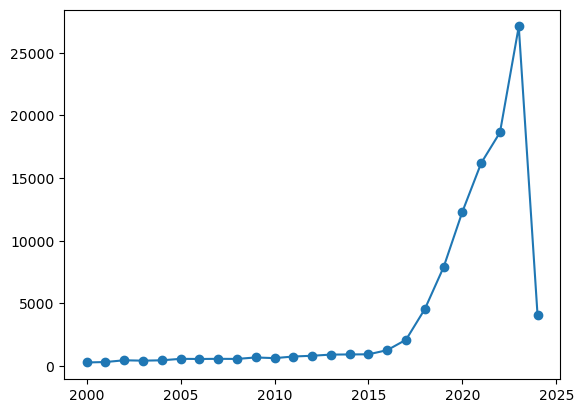

In [26]:
import matplotlib.pyplot as plt
ai_data = pd.DataFrame(difference_data['group_by'])
ai_data['key'] = ai_data['key'].astype(int)
ai_data['count'] = ai_data['count'].astype(int)

ai_data_sorted = ai_data.sort_values(by = "key")
#figure(figsize=(12, 8))
plt.plot(ai_data_sorted['key'], ai_data_sorted['count'],
         label='Artificial Intelligence', marker='o')
plt.show()

In [34]:
def fetch_publication_data(keyword):
    params = {
        'filter': f'title.search:{keyword},publication_year:>1999,publication_year:<2025',
        'group_by': 'publication_year',
    }
    response = requests.get(url_openalex_work, params=params)
    data = response.json()
    df = pd.DataFrame(data['group_by'])
    df['key'] = df['key'].astype(int)
    df['count'] = df['count'].astype(int)
    return df.sort_values(by="key")

keywords = ["artificial intelligence", "LLM", "GPT", "happy","alliens","economics","sleep"]


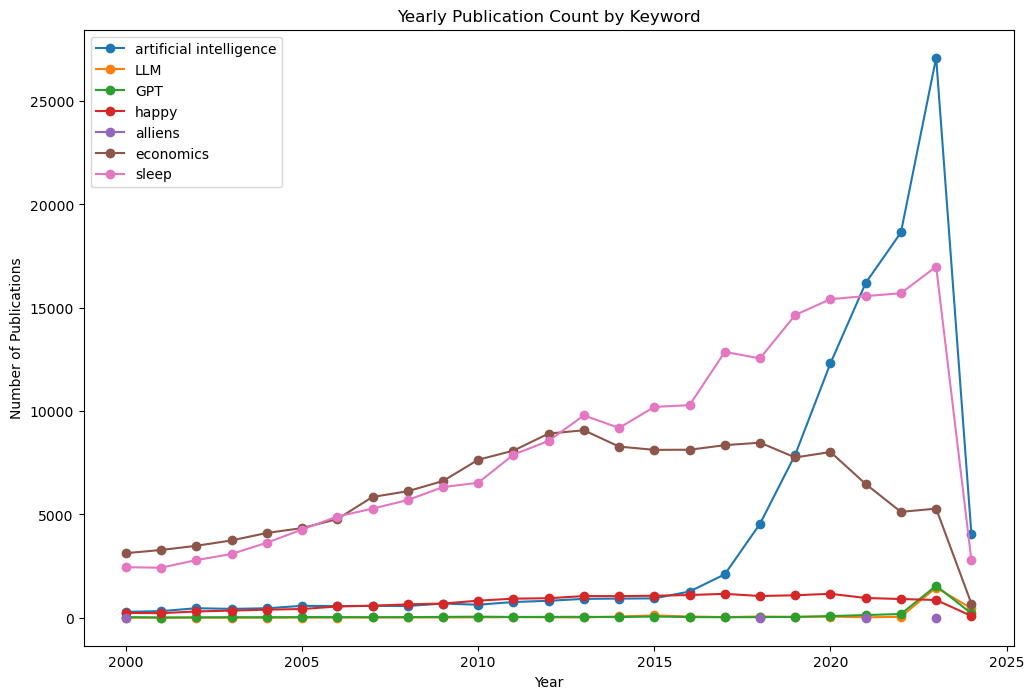

In [35]:
# Create a blank dataframe
combined_data = pd.DataFrame()

# Loop
for keyword in keywords:
    data = fetch_publication_data(keyword)
    combined_data[keyword] = data.set_index('key')['count']

# Present the graph
plt.figure(figsize=(12, 8))
for keyword in keywords:
    plt.plot(combined_data.index, combined_data[keyword], label=keyword, marker='o')

plt.title('Yearly Publication Count by Keyword')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.legend()
plt.show()